In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds

In [14]:
data = BinaryIV.generate_data_rolling_ate(N_simulations=10)

In [15]:
binaryIV = BinaryIV('IV Dag', data)

runtimes = binaryIV.run_all_bounding_algorithms(['PNS_causaloptim', 'PNS_autobound', 'PNS_zaffalonbounds'])
binaryIV.data

Running PNS_causaloptim...
PNS_causaloptim completed in 7.39 seconds.
Running PNS_autobound...
PNS_autobound completed in 5.26 seconds.
Running PNS_zaffalonbounds...
PNS_zaffalonbounds completed in 77.37 seconds.
Total runtime: 90.04 seconds.


,seed,intercept_X,intercept_Y,b_Z,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,PNS_causaloptim_bound_lower,PNS_causaloptim_bound_upper,PNS_causaloptim_bound_valid,PNS_causaloptim_bound_width,PNS_causaloptim_bound_failed,PNS_autobound_bound_lower,PNS_autobound_bound_upper,PNS_autobound_bound_valid,PNS_autobound_bound_width,PNS_autobound_bound_failed,PNS_zaffalonbounds_bound_lower,PNS_zaffalonbounds_bound_upper,PNS_zaffalonbounds_bound_valid,PNS_zaffalonbounds_bound_width,PNS_zaffalonbounds_bound_failed
0,962835,0,0,-1.128140,2.224124,-5.0,0.964529,-0.670388,0.004548,0.015555,0.685943,0.813233,0.117690,"[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.443111,0.657705,0.717910,0.584239,0.015035,0.063877,False,0.048841,False,-0.000000,0.063877,True,0.063877,False,0.0000,0.0462,True,0.0462,False
1,610922,0,0,-1.423007,-0.103737,-4.0,-0.754689,-0.347804,0.006489,0.010560,0.358363,0.787147,0.882326,"[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.578977,0.749059,0.713856,0.876346,0.025825,0.318841,False,0.293016,False,-0.000000,0.318841,True,0.318841,False,0.0000,0.5093,True,0.5093,False
2,576569,0,0,0.316526,-1.436981,-3.0,1.968756,-0.512861,0.026872,0.127561,0.640422,0.432972,0.599878,"[1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...","[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, ...","[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, ...","[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, ...",0.958042,0.952195,0.969769,0.988149,0.000000,0.200000,True,0.200000,False,-0.000000,0.200000,True,0.200000,False,0.0000,0.2091,True,0.2091,False
3,512028,0,0,-1.038204,-0.949901,-2.0,-0.623787,-0.293835,0.045990,0.074122,0.367957,0.872521,0.737716,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, ...",0.798350,0.546365,0.709765,0.899978,0.000000,0.462810,True,0.462810,False,-0.000000,0.462810,True,0.462810,False,0.0000,0.4982,True,0.4982,False
4,405539,0,0,1.009734,-0.613613,-1.0,0.356096,-0.236482,0.137627,0.301223,0.537705,0.395546,0.905080,"[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, ...",0.436470,0.984990,0.910787,0.937590,0.000000,0.355556,True,0.355556,False,-0.000000,0.355556,True,0.355556,False,0.0001,0.3059,True,0.3058,False
5,745784,0,0,0.710235,1.510565,0.0,0.319042,0.000000,0.244958,0.563747,0.563747,0.785542,0.005629,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, ...","[1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, ...",0.052915,0.709765,0.763803,0.983269,0.000000,0.333333,True,0.333333,False,-0.000000,0.333333,True,0.333333,False,0.0048,0.5758,True,0.5710,False
6,829678,0,0,1.152538,0.509328,1.0,1.800028,0.214061,0.338639,0.755606,0.541546,0.109664,0.731323,"[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...","[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, ...",0.778011,0.517753,0.855451,0.866124,0.157312,0.608696,True,0.451383,False,-0.000000,0.608696,True,0.608696,False,0.0014,0.4807,True,0.4793,False
7,155487,0,0,1.035595,-0.234570,2.0,1.558908,0.204790,0.236844,0.949438,0.744647,0.753361,0.334742,"[1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...","[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, ...","[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1

Algorithm: ATE_zaffalonbounds
  Fail Rate: 0.00%
  Invalid Rate: 25.00%
  Net Bound Width: 0.5749


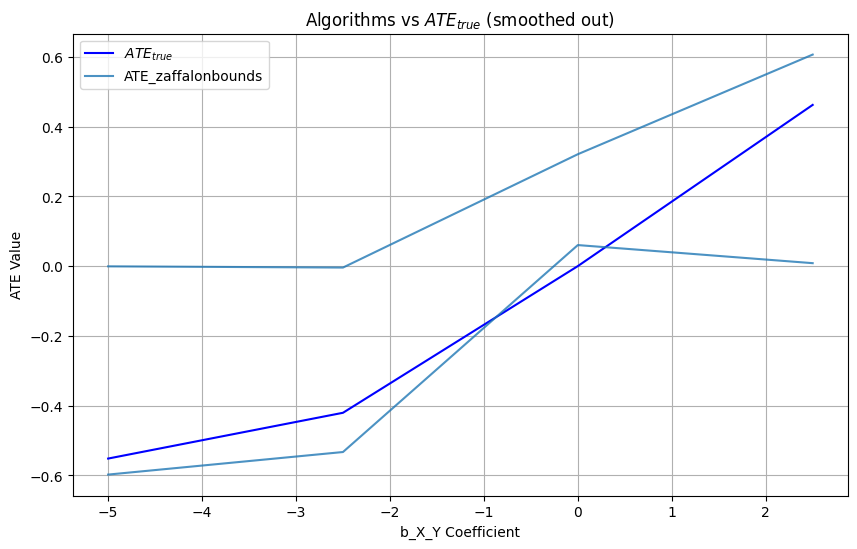

In [ ]:
algorithms = list(runtimes['runtimes'].keys())
PlottingUtil.print_bound_statistics(binaryIV.data, algorithms)
PlottingUtil.plot_smoothed_query_vs_bounds(binaryIV.data, 'PNS', algorithms, 1)

In [9]:
invalids = binaryIV.data[binaryIV.data['causaloptim_bound_valid'] == False]
invalIV = BinaryIV('IV Dag', invalids)
invalIV.bound_ate_causaloptim()
invalIV.data

caputured: R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In boundsfunc(p00_0 = p00_0, p00_1 = p00_1, p10_0 = p10_0, p10_1 = p10_1,  :
R[write to console]: 
 
R[write to console]:  Invalid bounds! Data probably does not satisfy the assumptions in the DAG!


Invalid Bounds detected
caputured: 
caputured: 


,seed,intercept_X,intercept_Y,b_Z,b_U_X,b_X_Y,b_U_Y,ATE_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,causaloptim_bound_lower,causaloptim_bound_upper,causaloptim_bound_valid,causaloptim_bound_width,causaloptim_bound_failed
3,944243,0,0,2.264300,-0.893513,-4.7,-0.207546,-0.448266,0.007581,0.455847,0.866774,0.819945,"[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.705637,0.599739,0.849943,0.517753,-0.344369,-0.348804,False,-0.004435,False
49,877939,0,0,-1.917451,1.823300,-0.1,-1.612648,-0.013956,0.168286,0.182243,0.949875,0.809191,"[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.697269,0.277840,0.998049,0.614823,-0.157216,-0.107379,False,0.049838,False
90,220567,0,0,-1.028126,-2.033834,4.0,0.054696,0.472237,0.982737,0.510499,0.792267,0.222949,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...",0.737642,0.781481,0.653109,0.963497,-0.282440,0.451923,False,0.734363,False
